<a href="https://colab.research.google.com/github/shashank02468/Performance-analysis-of-SMOTE-and-SMOTE-ENN-for-online-fraud-prediction/blob/main/Fraud_Detection_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/shashank02468/Performance-analysis-of-SMOTE-and-SMOTE-ENN-for-online-fraud-prediction.git

Cloning into 'Performance-analysis-of-SMOTE-and-SMOTE-ENN-for-online-fraud-prediction'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 1.14 MiB | 4.66 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings as wn
wn.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [ ]:
df_not_fraud = df[df['isFraud'] == 0]
df_fraudulent = df[df['isFraud'] == 1]

In [ ]:
df_not_fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362319,718,PAYMENT,8634.29,C642813806,518802.0,510167.71,M747723689,0.00,0.00,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.0,0.00,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.0,0.00,C1515639522,24893.67,211167.51,0,0
6362322,718,TRANSFER,82096.45,C614459560,13492.0,0.00,C855350324,0.00,82096.45,0,0


In [ ]:
df_fraudulent

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
df_notfraud_sampled = df_not_fraud.sample(frac=0.3, random_state=1)
df_fraud_sampled = df_fraudulent.sample(frac=0.3, random_state=1)

In [ ]:
df_notfraud_sampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1697235,159,CASH_IN,290448.64,C683933272,49671.00,340119.64,C948751934,34047.63,0.00,0,0
491213,19,PAYMENT,7521.26,C1434220511,0.00,0.00,M2098189366,0.00,0.00,0,0
2663119,210,PAYMENT,12043.69,C1632575026,0.00,0.00,M83346807,0.00,0.00,0,0
5159889,357,CASH_IN,120116.21,C835727091,97688.68,217804.90,C2084926563,849069.38,728953.17,0,0
2707009,211,CASH_OUT,115161.12,C1656739705,0.00,0.00,C778089718,576802.51,691963.63,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1722032,160,PAYMENT,2149.66,C1613135420,2185.00,35.34,M884489497,0.00,0.00,0,0
1638515,157,CASH_IN,217894.16,C801710141,6061151.18,6279045.34,C157619643,993726.88,775832.71,0,0
5199464,369,PAYMENT,18891.20,C641623432,0.00,0.00,M851050798,0.00,0.00,0,0
1038346,94,CASH_IN,292902.20,C550509895,6346570.71,6639472.91,C2030142449,2316618.85,2023716.65,0,0


In [ ]:
df_fraud_sampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
12214,7,TRANSFER,21571.00,C786114805,21571.00,0.00,C1666314150,0.00,0.00,1,0
3638348,275,TRANSFER,21323.28,C498498940,21323.28,0.00,C490070900,0.00,0.00,1,0
2250316,187,CASH_OUT,2044841.02,C1943035260,2044841.02,0.00,C1552135476,397169.10,2442010.12,1,0
5188035,365,CASH_OUT,916644.03,C673817136,916644.03,0.00,C2054229425,2026.90,918670.94,1,0
6290957,661,TRANSFER,10000000.00,C1058583308,12140888.35,2140888.35,C2061400193,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6064972,506,TRANSFER,1048100.00,C1355391463,1048100.00,0.00,C1870887119,0.00,0.00,1,0
6280300,644,CASH_OUT,513610.51,C786682293,513610.51,0.00,C995315551,954248.26,1467858.76,1,0
3611013,272,TRANSFER,177022.52,C892131822,177022.52,0.00,C844865785,0.00,0.00,1,0
6272918,623,TRANSFER,67128.33,C499091192,67128.33,0.00,C871329563,0.00,0.00,1,0


In [ ]:
df_combined = pd.concat([df_notfraud_sampled, df_fraud_sampled], ignore_index=True)
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)
df_combined

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,15,CASH_IN,99195.87,C1242050031,13344815.99,13444011.86,C562262220,1238936.27,1139740.41,0,0
1,212,CASH_OUT,37864.43,C1536443887,0.00,0.00,C77617210,3636038.58,3673903.01,0,0
2,595,CASH_OUT,816452.19,C228196194,816452.19,0.00,C253339392,1218091.00,2034543.19,1,0
3,161,CASH_OUT,172505.85,C308467602,34857.61,0.00,C1231389969,898125.93,1070631.78,0,0
4,33,CASH_IN,118504.70,C1455208690,3744874.21,3863378.91,C932751803,507769.93,389265.23,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1908781,18,PAYMENT,1152.19,C1027936137,104867.00,103714.81,M1583416171,0.00,0.00,0,0
1908782,376,CASH_IN,116773.61,C1612393900,1423099.10,1539872.71,C2000121471,5904306.37,5787532.77,0,0
1908783,325,TRANSFER,2178260.18,C1201390113,31160.00,0.00,C1666538594,0.00,2178260.18,0,0
1908784,41,PAYMENT,5689.07,C1143149172,5084.00,0.00,M1627649278,0.00,0.00,0,0


In [ ]:
df_combined['isFraud'].value_counts()

,count
isFraud,
0,1906322
1,2464


In [ ]:
df_combined.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [ ]:
df_combined.nunique()

,0
step,725
type,5
amount,1793983
nameOrig,1907932
oldbalanceOrg,647271
newbalanceOrig,818830
nameDest,1054899
oldbalanceDest,1092341
newbalanceDest,1136149
isFraud,2


In [ ]:
df_combined.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
duplicates = df_combined.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


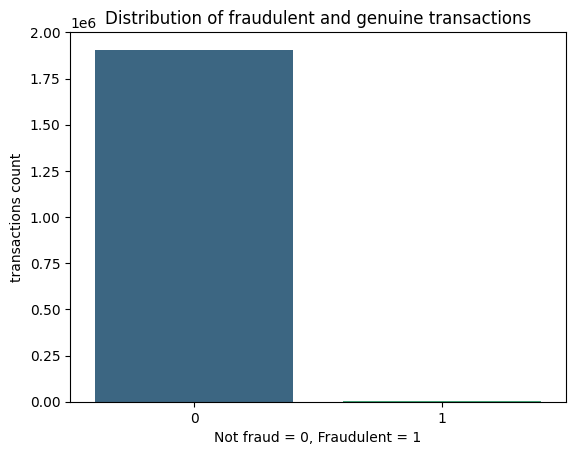

,count
isFraud,
0,1906322
1,2464


In [ ]:
sns.countplot(data=df_combined, palette='viridis', x='isFraud')
plt.title('Distribution of fraudulent and genuine transactions')
plt.ylabel('transactions count')
plt.xlabel('Not fraud = 0, Fraudulent = 1')
plt.show()
df_combined['isFraud'].value_counts()

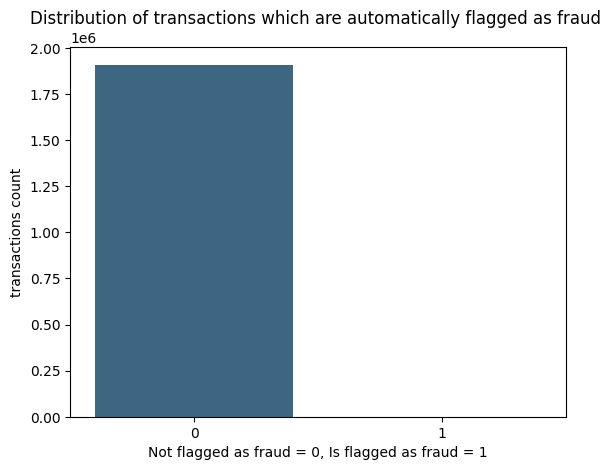

,count
isFlaggedFraud,
0,1908779
1,7


In [ ]:
sns.countplot(data=df_combined, palette='viridis', x='isFlaggedFraud')
plt.title('Distribution of transactions which are automatically flagged as fraud ')
plt.ylabel('transactions count')
plt.xlabel('Not flagged as fraud = 0, Is flagged as fraud = 1')
plt.show()
df_combined['isFlaggedFraud'].value_counts()

In [ ]:
df_combined['type'].value_counts()

,count
type,
CASH_OUT,672042
PAYMENT,645318
CASH_IN,419343
TRANSFER,159726
DEBIT,12357


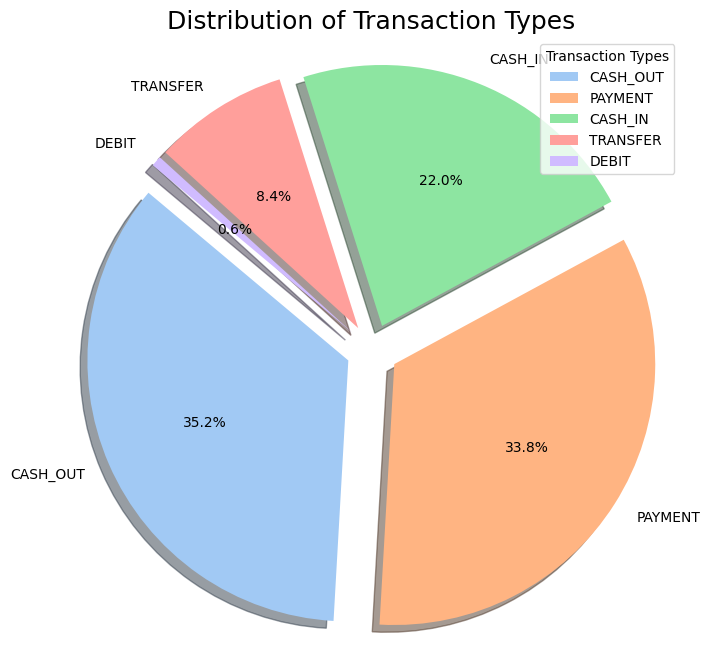

In [ ]:
type_counts = df_combined['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts.values, labels=type_counts.index,
    autopct='%1.1f%%', startangle=140, explode=[0.1]*len(type_counts),
    shadow=True, colors=sns.color_palette('pastel'))

plt.title('Distribution of Transaction Types', fontsize=18)
plt.axis('equal')
plt.legend(title='Transaction Types')
plt.show()

In [ ]:
fraud_type_cnt = df_combined.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
fraud_type_cnt.columns = ['Not fraud (0)', 'fraudulent (1)']
fraud_type_cnt

,Not fraud (0),fraudulent (1)
type,,
CASH_IN,419343,0
CASH_OUT,670824,1218
DEBIT,12357,0
PAYMENT,645318,0
TRANSFER,158480,1246


In [ ]:
fraud_balance_cnt = df_fraud_sampled.groupby(['newbalanceOrig', 'oldbalanceOrg', 'isFraud']).size().unstack(fill_value=0)
fraud_balance_cnt.columns = ['fraudulent (1)']
fraud_balance_cnt.head(10)

fraudulent (1)
newbalanceOrig oldbalanceOrg                
0.0            0.00                        9
               119.00                      1
               119.65                      1
               164.00                      1
               170.00                      1
               210.92                      1
               215.83                      1
               222.00                      1
               408.00                      1
               889.76                      1

In [ ]:
fraud_balance_cnt.tail(10)

,,fraudulent (1)
newbalanceOrig,oldbalanceOrg,
23576297.10,33576297.10,1
25674547.89,35674547.89,1
27418265.31,37418265.31,1
27670038.08,37670038.08,1
30399045.08,40399045.08,1
34892193.09,44892193.09,1
35674547.89,45674547.89,1
37316255.05,47316255.05,1
39585040.37,49585040.37,1


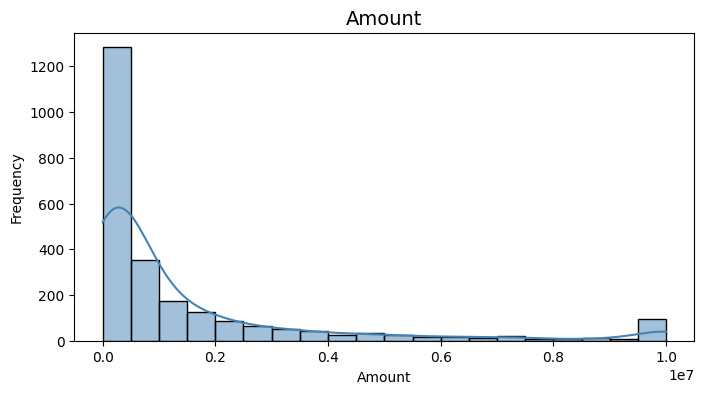

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_fraud_sampled['amount'], bins=20, kde=True, color='steelblue')
plt.title("Amount", fontsize=14)
plt.ylabel("Frequency")
plt.xlabel("Amount")
plt.show()

In [ ]:
categorical_columns = df_combined.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in categorical_columns:
    df_combined[col] = le.fit_transform(df_combined[col])
df_combined.dtypes

,0
step,int64
type,int64
amount,float64
nameOrig,int64
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,int64
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


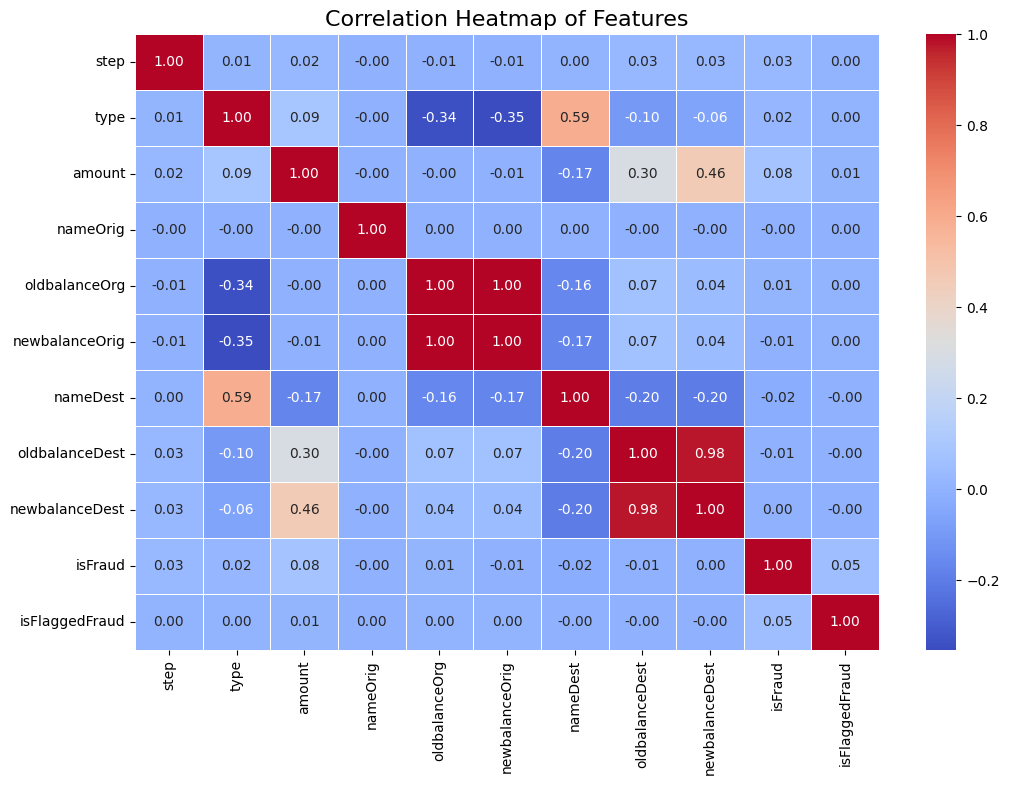

In [ ]:
corr_matrix = df_combined.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

In [ ]:
df_combined.to_csv('cleaned_online_fraud.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df_combined = pd.read_csv('/content/drive/MyDrive/cleaned_online_fraud.csv')
df_combined.shape

(1908786, 11)

In [ ]:
df_combined['isFraud'].value_counts()

,count
isFraud,
0,1906322
1,2464


In [ ]:
X = df_combined.drop('isFraud', axis=1)
y = df_combined['isFraud']
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=2)
# 60% data taken for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)
#20% data taken for validation and 20% taken for testing

X_train_sub = X_train.sample(n=100000, random_state=2) #downsampling data for hyperparameter tuning
y_train_sub = y_train.loc[X_train_sub.index]

print("Distibution of classes in the target column before the application of SMOTE:", Counter(y))
print("Distibution of classes in the target column after the application of SMOTE:", Counter(y_resampled))
print(f"""
Online Fraud Prediction Dataset Split:
- Training Samples   : {X_train.shape}
- Validation Samples : {X_val.shape}
- Testing Samples    : {X_test.shape}
""")

Distibution of classes in the target column before the application of SMOTE: Counter({0: 1906322, 1: 2464})
Distibution of classes in the target column after the application of SMOTE: Counter({0: 1906322, 1: 1906322})

Online Fraud Prediction Dataset Split:
- Training Samples   : (2287586, 10)
- Validation Samples : (762529, 10)
- Testing Samples    : (762529, 10)



In [ ]:
lr_model = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

lr_grid_search = GridSearchCV(lr_model, param_grid, cv=2, scoring='accuracy')
lr_grid_search.fit(X_train_sub, y_train_sub)
lr_bst_param = lr_grid_search.best_params_
print("Best parameters of LR: ", lr_bst_param)
print("Best cross-validation score: {:.2f}".format(lr_grid_search.best_score_))

Best parameters of LR:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.96



Training time for LR: 1420.0664 sec.
LR Training Accuracy: 0.9592
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    380890
           1       0.96      0.96      0.96    381639

    accuracy                           0.96    762529
   macro avg       0.96      0.96      0.96    762529
weighted avg       0.96      0.96      0.96    762529



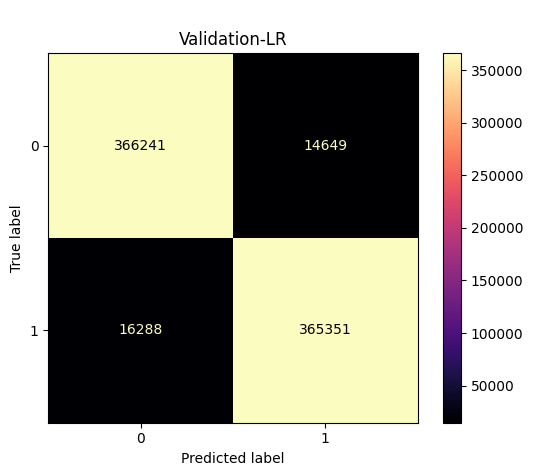

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    381397
           1       0.96      0.96      0.96    381132

    accuracy                           0.96    762529
   macro avg       0.96      0.96      0.96    762529
weighted avg       0.96      0.96      0.96    762529



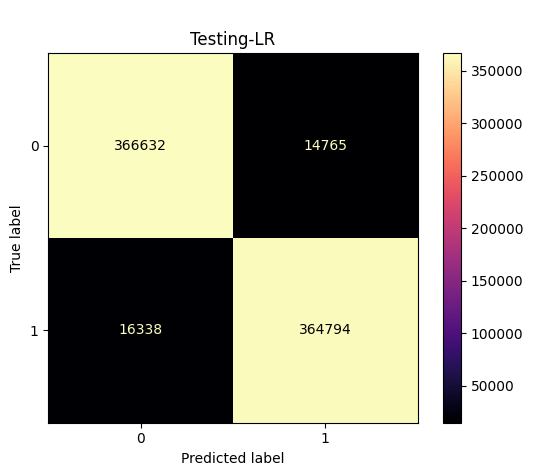

In [ ]:
time_start = time.time()
best_lr_model = LogisticRegression(**lr_bst_param)
best_lr_model.fit(X_train, y_train)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for LR: {time_train:.4f} sec.")
accuracy_train = best_lr_model.score(X_train, y_train)
print(f"LR Training Accuracy: {accuracy_train:.4f}")

y_pred_val = best_lr_model.predict(X_val)
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-LR')
plt.show()

y_pred_test = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-LR')
plt.show()

In [ ]:
rf_model = RandomForestClassifier()

param_grid = {'n_estimators': [50, 80, 100],
              'max_depth': [3, 5, 8],
              'min_samples_split': [5, 10],
              'min_samples_leaf': [2, 4, 6],
              'max_features': ['sqrt', 'log2']}

rf_grid_search = GridSearchCV(rf_model, param_grid, cv=2, scoring='accuracy')
rf_grid_search.fit(X_train_sub, y_train_sub)
rf_bst_param = rf_grid_search.best_params_
print("Best parameters of RF: ", rf_bst_param)
print("Best cross-validation score: {:.2f}".format(rf_grid_search.best_score_))

Best parameters of RF:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score: 0.99



Training time for RF: 372.7198 sec.
RF Training Accuracy: 0.9869
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    380890
           1       0.98      1.00      0.99    381639

    accuracy                           0.99    762529
   macro avg       0.99      0.99      0.99    762529
weighted avg       0.99      0.99      0.99    762529



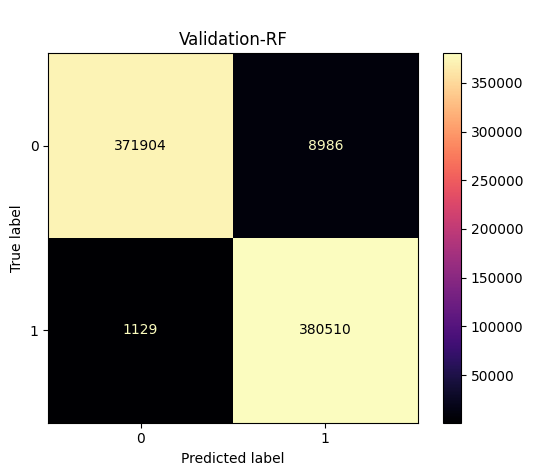

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    381397
           1       0.98      1.00      0.99    381132

    accuracy                           0.99    762529
   macro avg       0.99      0.99      0.99    762529
weighted avg       0.99      0.99      0.99    762529



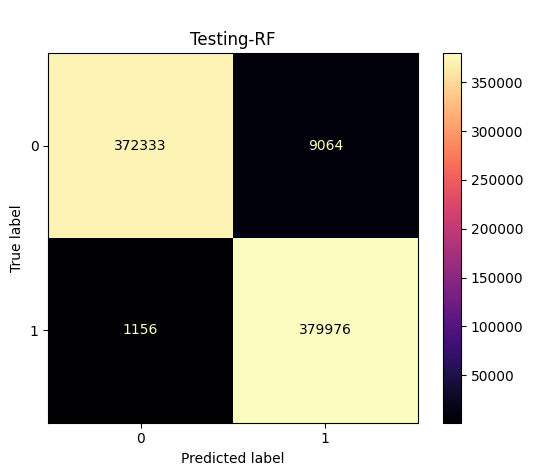

In [ ]:
time_start = time.time()
best_rf_model = RandomForestClassifier(**rf_bst_param)
best_rf_model.fit(X_train, y_train)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for RF: {time_train:.4f} sec.")
accuracy_train = best_rf_model.score(X_train, y_train)
print(f"RF Training Accuracy: {accuracy_train:.4f}")

y_pred_val = best_rf_model.predict(X_val)
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-RF')
plt.show()

y_pred_test = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-RF')
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier()

param_grid = {'criterion':['gini', 'entropy'],
              'max_depth': [3, 5, 8],
              'min_samples_split': [5, 10],
              'min_samples_leaf': [2, 4, 6],
              'max_features': ['sqrt', 'log2']}

dt_grid_search = GridSearchCV(dt_model, param_grid, cv=2, scoring='accuracy')
dt_grid_search.fit(X_train_sub, y_train_sub)
dt_bst_param = dt_grid_search.best_params_
print("Best parameters of DT: ", dt_bst_param)
print("Best cross-validation score: {:.2f}".format(dt_grid_search.best_score_))

Best parameters of DT:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score: 0.98



Training time for DT: 9.3607 sec.
DT Training Accuracy: 0.9713
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    380890
           1       0.96      0.98      0.97    381639

    accuracy                           0.97    762529
   macro avg       0.97      0.97      0.97    762529
weighted avg       0.97      0.97      0.97    762529



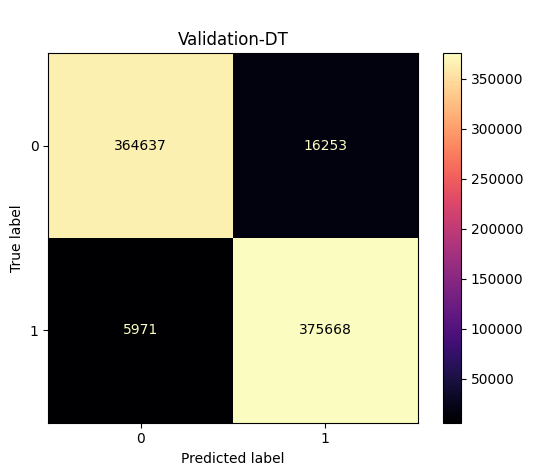

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    381397
           1       0.96      0.98      0.97    381132

    accuracy                           0.97    762529
   macro avg       0.97      0.97      0.97    762529
weighted avg       0.97      0.97      0.97    762529



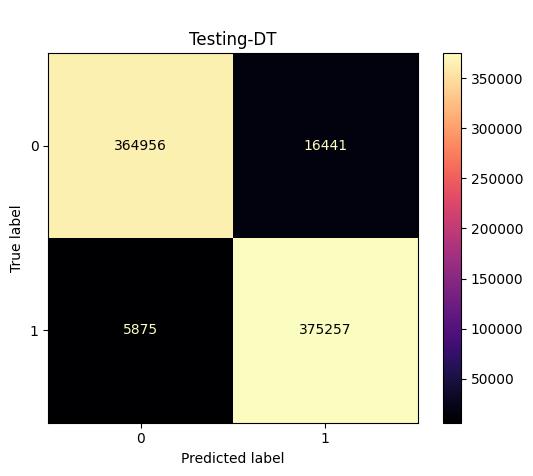

In [ ]:
time_start = time.time()
best_dt_model = DecisionTreeClassifier(**dt_bst_param)
best_dt_model.fit(X_train, y_train)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for DT: {time_train:.4f} sec.")
accuracy_train = best_dt_model.score(X_train, y_train)
print(f"DT Training Accuracy: {accuracy_train:.4f}")

y_pred_val = best_dt_model.predict(X_val)
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-DT')
plt.show()

y_pred_test = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-DT')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [5, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree']}

knn_grid_search = GridSearchCV(knn_model, param_grid, cv=2, scoring='accuracy')
knn_grid_search.fit(X_train_sub, y_train_sub)
knn_bst_param = knn_grid_search.best_params_
print("Best parameters of KNN: ", knn_bst_param)
print("Best cross-validation score: {:.2f}".format(knn_grid_search.best_score_))

Best parameters of KNN:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.97


In [ ]:
X_val_sub = X_val.sample(n=30000, random_state=2)
y_val_sub = y_val.loc[X_val_sub.index]
X_test_sub = X_test.sample(n=30000, random_state=2)
y_test_sub = y_test.loc[X_test_sub.index]

In [ ]:
y_test_sub.value_counts()

,count
isFraud,
0,15059
1,14941



Training time for KNN: 0.1466 sec.
KNN Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     14880
           1       0.96      1.00      0.98     15120

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



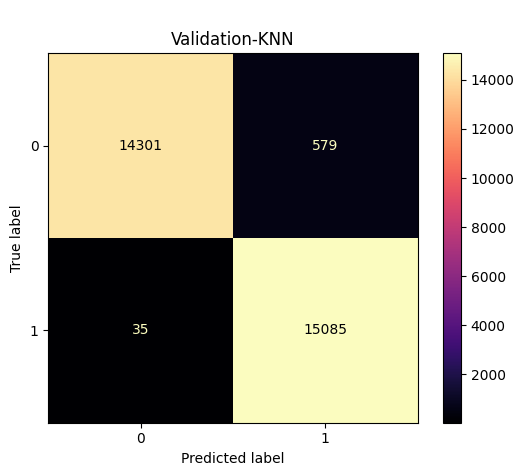

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15059
           1       0.96      1.00      0.98     14941

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



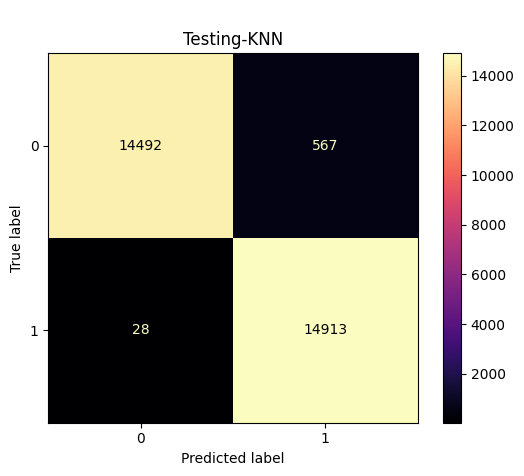

In [ ]:
time_start = time.time()
best_knn_model = KNeighborsClassifier(**knn_bst_param)
best_knn_model.fit(X_train_sub, y_train_sub)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for KNN: {time_train:.4f} sec.")
accuracy_train = best_knn_model.score(X_train_sub, y_train_sub)
print(f"KNN Training Accuracy: {accuracy_train:.4f}")

#------ Predicting on the validation samples
y_pred_val = best_knn_model.predict(X_val_sub)
print(classification_report(y_val_sub, y_pred_val))
cm_val = confusion_matrix(y_val_sub, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-KNN')
plt.show()

#------ Predicting on the testing samples
y_pred_test = best_knn_model.predict(X_test_sub)
print(classification_report(y_test_sub, y_pred_test))
cm_test = confusion_matrix(y_test_sub, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-KNN')
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN

In [ ]:
df_combined = pd.read_csv('/content/drive/MyDrive/cleaned_online_fraud.csv')
df_combined.shape

(1908786, 11)

In [ ]:
df_combined['isFraud'].value_counts()

,count
isFraud,
0,1906322
1,2464


In [ ]:
X = df_combined.drop('isFraud', axis=1)
y = df_combined['isFraud']
X_resampled, y_resampled = SMOTEENN().fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=2)
X_train_sub = X_train.sample(n=100000, random_state=2)
y_train_sub = y_train.loc[X_train_sub.index]

print("Distibution of classes in the target column before the application of SMOTEENN:", Counter(y))
print("Distibution of classes in the target column after the application of SMOTEENN:", Counter(y_resampled))
print(f"""
Online Fraud Prediction Dataset Split:
- Training Samples   : {X_train.shape}
- Validation Samples : {X_val.shape}
- Testing Samples    : {X_test.shape}
""")

Distibution of classes in the target column before the application of SMOTEENN: Counter({0: 1906322, 1: 2464})
Distibution of classes in the target column after the application of SMOTEENN: Counter({1: 1906176, 0: 1895677})

Online Fraud Prediction Dataset Split:
- Training Samples   : (2281111, 10)
- Validation Samples : (760371, 10)
- Testing Samples    : (760371, 10)



In [ ]:
lr_model = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

lr_grid_search = GridSearchCV(lr_model, param_grid, cv=2, scoring='accuracy')
lr_grid_search.fit(X_train_sub, y_train_sub)
lr_bst_param = lr_grid_search.best_params_
print("Best parameters of LR: ", lr_bst_param)
print("Best cross-validation score: {:.2f}".format(lr_grid_search.best_score_))

Best parameters of LR:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.96



Training time for LR: 1633.1376 sec.
LR Training Accuracy: 0.9611
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    379095
           1       0.96      0.96      0.96    381278

    accuracy                           0.96    760373
   macro avg       0.96      0.96      0.96    760373
weighted avg       0.96      0.96      0.96    760373



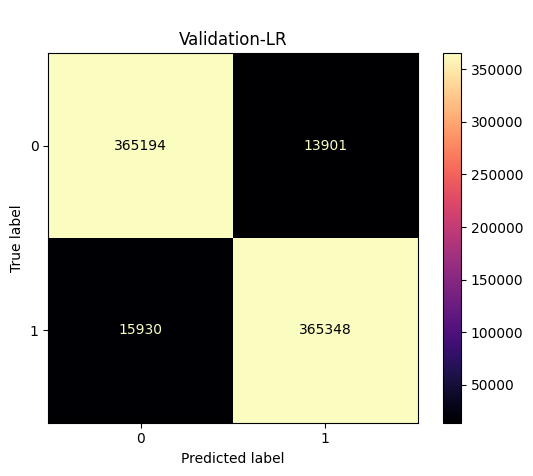

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    378948
           1       0.96      0.96      0.96    381426

    accuracy                           0.96    760374
   macro avg       0.96      0.96      0.96    760374
weighted avg       0.96      0.96      0.96    760374



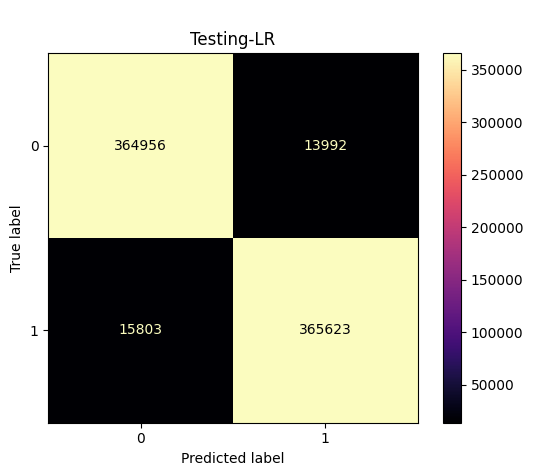

In [ ]:
time_start = time.time()
best_lr_model = LogisticRegression(**lr_bst_param)
best_lr_model.fit(X_train, y_train)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for LR: {time_train:.4f} sec.")
accuracy_train = best_lr_model.score(X_train, y_train)
print(f"LR Training Accuracy: {accuracy_train:.4f}")


y_pred_val = best_lr_model.predict(X_val)
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-LR')
plt.show()


y_pred_test = best_lr_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-LR')
plt.show()

In [ ]:
rf_model = RandomForestClassifier()

param_grid = {'n_estimators': [50, 80, 100],
              'max_depth': [3, 5, 8],
              'min_samples_split': [5, 10],
              'min_samples_leaf': [2, 4, 6],
              'max_features': ['sqrt', 'log2']}

rf_grid_search = GridSearchCV(rf_model, param_grid, cv=2, scoring='accuracy')
rf_grid_search.fit(X_train_sub, y_train_sub)
rf_bst_param = rf_grid_search.best_params_
print("Best parameters of RF: ", rf_bst_param)
print("Best cross-validation score: {:.2f}".format(rf_grid_search.best_score_))

Best parameters of RF:  {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 80}
Best cross-validation score: 0.99



Training time for RF: 687.7749 sec.
RF Training Accuracy: 0.9887
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    378287
           1       0.98      1.00      0.99    382084

    accuracy                           0.99    760371
   macro avg       0.99      0.99      0.99    760371
weighted avg       0.99      0.99      0.99    760371



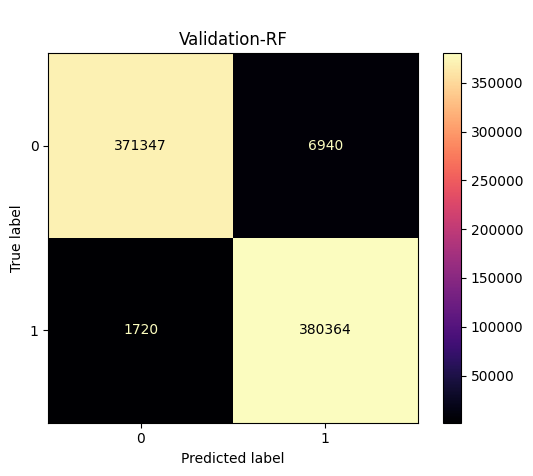

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    379722
           1       0.98      1.00      0.99    380649

    accuracy                           0.99    760371
   macro avg       0.99      0.99      0.99    760371
weighted avg       0.99      0.99      0.99    760371



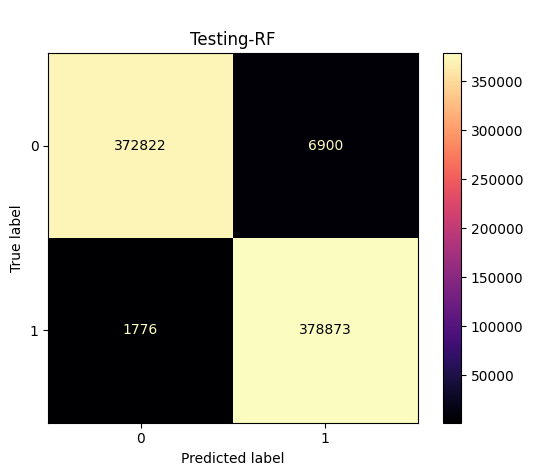

In [ ]:
time_start = time.time()
best_rf_model = RandomForestClassifier(**rf_bst_param)
best_rf_model.fit(X_train, y_train)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for RF: {time_train:.4f} sec.")
accuracy_train = best_rf_model.score(X_train, y_train)
print(f"RF Training Accuracy: {accuracy_train:.4f}")


y_pred_val = best_rf_model.predict(X_val)
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-RF')
plt.show()


y_pred_test = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-RF')
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier()

param_grid = {'criterion':['gini', 'entropy'],
              'max_depth': [3, 5, 8],
              'min_samples_split': [5, 10],
              'min_samples_leaf': [2, 4, 6],
              'max_features': ['sqrt', 'log2']}

dt_grid_search = GridSearchCV(dt_model, param_grid, cv=2, scoring='accuracy')
dt_grid_search.fit(X_train_sub, y_train_sub)
dt_bst_param = dt_grid_search.best_params_
print("Best parameters of DT: ", dt_bst_param)
print("Best cross-validation score: {:.2f}".format(dt_grid_search.best_score_))

Best parameters of DT:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5}
Best cross-validation score: 0.98



Training time for DT: 17.8843 sec.
DT Training Accuracy: 0.9523
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    378287
           1       0.92      0.99      0.95    382084

    accuracy                           0.95    760371
   macro avg       0.96      0.95      0.95    760371
weighted avg       0.95      0.95      0.95    760371



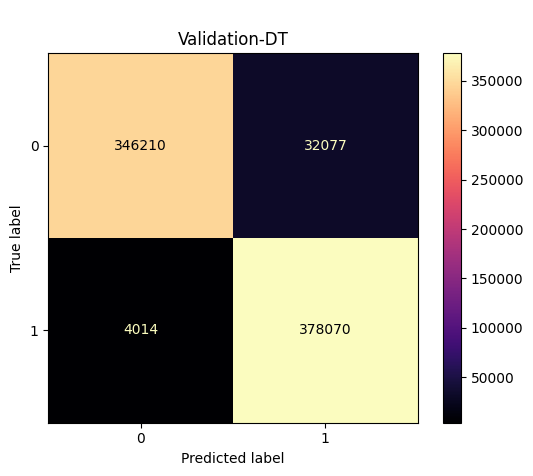

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    379722
           1       0.92      0.99      0.95    380649

    accuracy                           0.95    760371
   macro avg       0.95      0.95      0.95    760371
weighted avg       0.95      0.95      0.95    760371



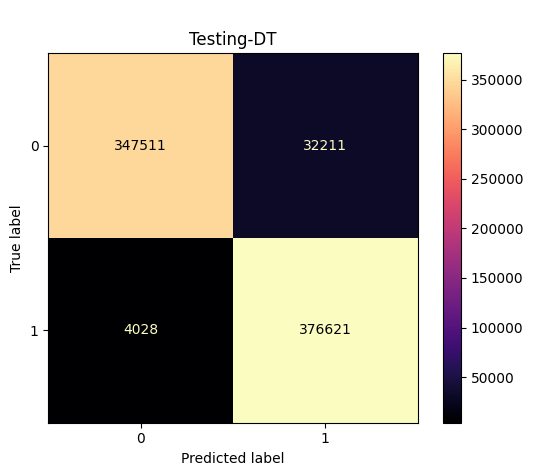

In [ ]:
time_start = time.time()
best_dt_model = DecisionTreeClassifier(**dt_bst_param)
best_dt_model.fit(X_train, y_train)
time_end = time.time()
time_train = time_end - time_start
print(f"\nTraining time for DT: {time_train:.4f} sec.")
accuracy_train = best_dt_model.score(X_train, y_train)
print(f"DT Training Accuracy: {accuracy_train:.4f}")


y_pred_val = best_dt_model.predict(X_val)
print(classification_report(y_val, y_pred_val))
cm_val = confusion_matrix(y_val, y_pred_val)
ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nValidation-DT')
plt.show()


y_pred_test = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1]).plot(cmap='magma')
plt.title('\nTesting-DT')
plt.show()